In [1]:
import pandas as pd
import numpy as np
import datetime

# Downloading data

In [2]:
data = pd.ExcelFile("risk_tz.xlsx")

In [3]:
data.sheet_names

['Задание', '1_data jan-may', '2_Data jun-jul Fcst']

In [4]:
train_data = data.parse('1_data jan-may')

In [5]:
test_data = data.parse('2_Data jun-jul Fcst')

# Preprocessing of data

Removing skips and incorrect dates

In [6]:
train_data['Дата начала работы на текущей должности'] = train_data['Дата начала работы на текущей должности'].fillna(
    train_data['Дата начала'])
test_data['Дата начала работы на текущей должности'] = test_data['Дата начала работы на текущей должности'].fillna(
    test_data['Дата начала'])

def func_year(date):
    return int(date.split('.')[2])
train_data = train_data[train_data['Дата начала работы на текущей должности'].apply(func_year).between(1940, 2014)]
test_data = test_data[test_data['Дата начала работы на текущей должности'].apply(func_year).between(1940, 2014)]

Converting columns that contain a date into a date type from object

In [7]:
date_column = ['Дата начала', 'Дата окончания', 'Дата окончания сПролонгацией', 'Дата рождения',
               'Дата окончания начислений', 'Дата окончательной оплаты', 'Дата начала работы на текущей должности']

for column in date_column:
    train_data[column] = pd.to_datetime(train_data[column], dayfirst=True)
    test_data[column] = pd.to_datetime(test_data[column], dayfirst=True)

Removing gaps in numeric columns

In [8]:
number_columns = ['Количество детей', 'Количество иждивенцев', 'Номер клиента','Сумма займа', 'Количество детей',                                                            
                'Количество иждивенцев', 'Сумма дохода заемщика', 'Оплаты по процентам', 'Оплаты по телу', 'Долг всего',
                'Долг по телу (на дату отчета)', 'Долг по процентам (на дату отчета)', 'Просрочка по телу (на дату отчета)',
                'Просрочка по процентам (на дату отчета)', 'К-во дней просрочки по телу (на дату отчета)', 'Длительность кредита',   
                'макс размер тела, которое было в просрочке 30+ дней просрочки', 'Начисленно по процентам',             
                'макс к-во дней просрочки по телу (исторически за все время жизни кредита)', 'Долг всего просроченно']    
train_data[number_columns] = train_data[number_columns].fillna(0)
test_data[number_columns] = test_data[number_columns].fillna(0)

Removing gaps in columns with categorical data

In [9]:
cat_columns = ['Договор номер', 'Пол', 'Подразделение', 'Город выдачи', 'Область выдачи', 'Семейное положение', 'Этап контроля', 
            'Занятость не трудоустроен','Занятость трудоустроен не официально', 'Занятость трудоустроен официально',
            'Занятость пенсионер', 'Занятость студент', 'Должность', 'Сфера деятельности', 'Периодичность дохода', 'Погашен']
train_data[cat_columns] = train_data[cat_columns].fillna('Нет').applymap(str)
test_data[cat_columns] = test_data[cat_columns].fillna('Нет').applymap(str)

Finding the age, length of service and duration of prolongation

In [10]:
train_data['Возраст'] = train_data['Дата начала'] - train_data['Дата рождения']
train_data['Стаж работы'] = train_data['Дата начала'] - train_data['Дата начала работы на текущей должности']

test_data['Возраст'] = test_data['Дата начала'] - test_data['Дата рождения']
test_data['Стаж работы'] = test_data['Дата начала'] - test_data['Дата начала работы на текущей должности']

date_int_columns = ['Стаж работы', 'Возраст']

for column in date_int_columns:
    train_data[column] = train_data[column].dt.days
    test_data[column] = test_data[column].dt.days

In [11]:
train_data['Пролонгация'] = train_data['Дата окончания сПролонгацией'] - train_data['Дата начала'] 
train_data['Пролонгация'] = train_data['Пролонгация'].dt.days + 1

Removing columns with a date (except for the initial one), since they are not in the test dataset

In [12]:
train_data['Стаж работы'][train_data['Стаж работы'] < 0]= 0
test_data['Стаж работы'][test_data['Стаж работы'] < 0]= 0

train_data.drop(date_column[1:], inplace = True, axis = 1)
test_data.drop(date_column[1:], inplace = True, axis = 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13346 entries, 0 to 13386
Data columns (total 37 columns):
Договор номер                                                                13346 non-null object
Номер клиента                                                                13346 non-null int64
Дата начала                                                                  13346 non-null datetime64[ns]
Длительность кредита                                                         13346 non-null float64
Сумма займа                                                                  13346 non-null int64
Пол                                                                          13346 non-null object
Подразделение                                                                13346 non-null object
Город выдачи                                                                 13346 non-null object
Область выдачи                                                               13346 non-null 

Counting the number of unique values among categorical attributes

In [14]:
position_unique = train_data['Должность'].unique()
activity_unique = train_data['Сфера деятельности'].unique()
subdivision_unique = train_data['Подразделение'].unique()
city_unique = train_data['Город выдачи'].unique()
region_unique = train_data['Область выдачи'].unique()
sex_unique = train_data['Пол'].unique()
marital_unique = train_data['Семейное положение'].unique()
periodicity_unique = train_data['Периодичность дохода'].unique()
extinguished_unique = train_data['Погашен'].unique()
control_unique = train_data['Этап контроля'].unique()

In [15]:
cat_unique = {'Должность': len(position_unique), 'Сфера деятельности': len(activity_unique), 'Подразделение': len(subdivision_unique),
    'Город выдачи': len(city_unique), 'Область выдачи': len(region_unique), 'Пол': len(sex_unique), 'Этап контроля': len(control_unique),
    'Семейное положение': len(marital_unique), 'Периодичность дохода': len(periodicity_unique), 'Погашен': len(extinguished_unique)}

In [16]:
cat_unique

{'Город выдачи': 38,
 'Должность': 1867,
 'Область выдачи': 10,
 'Периодичность дохода': 4,
 'Погашен': 2,
 'Подразделение': 78,
 'Пол': 2,
 'Семейное положение': 4,
 'Сфера деятельности': 772,
 'Этап контроля': 11}

In the variables: 'Должность' and 'Сфера деятельности' too many unique values, therefore it is possible to retrain. As a result of further testing, the variables -  'Этап контроля' and  'Подразделение' did not affect the quality of the algorithms, and in some cases, worsened the quality

Creation of new clients based on the variables of the training dataset

In [17]:
income_person_dict = {'общая сумма тела': 0, 'общий доход от процентов': 0, 'количество кредитов': 0, 
                      'максимальный размер тела в просрочке': 0}
income_dict = {person_id: {'общая сумма тела': 0, 'общий доход от процентов': 0, 'количество кредитов': 0, 
                      'максимальный размер тела в просрочке': 0} for person_id in train_data['Номер клиента'].unique()}

In [18]:
history_person_dict = {'1-29DayLate': 0, '30-59DayLate': 0, '60-89DayLate': 0, 'over89DayLate': 0, 'maxLate': 0}
history_dict = {person_id: {'1-29DayLate': 0, '30-59DayLate': 0, '60-89DayLate': 0, 'over89DayLate': 0, 'maxLate': 0} for person_id in train_data['Номер клиента'].unique()}

In [19]:
for income in income_person_dict.keys():
    train_data[income] = 0
    test_data[income] = 0
for history in history_person_dict.keys():
    train_data[history] = 0
    test_data[history] = 0

In [20]:
train_data.sort_values(by=['Дата начала', 'Номер клиента'], inplace = True)
train_data.reset_index(drop=True, inplace = True)
test_data.reset_index(drop=True, inplace = True)

In [21]:
%%time
#INCOME
for index in range(train_data.shape[0]):
    client_id = train_data.loc[index, 'Номер клиента']
    if client_id in income_dict.keys():
        for income in income_person_dict.keys():
            train_data.loc[index, income] = income_dict[client_id][income]
        income_dict[client_id]['максимальный размер тела в просрочке'] = train_data.loc[index,
                                                        'макс размер тела, которое было в просрочке 30+ дней просрочки']
        income_dict[client_id]['общая сумма тела'] += train_data.loc[index, 'Сумма займа']
        income_dict[client_id]['общий доход от процентов'] += train_data.loc[index, 'Оплаты по процентам']
        income_dict[client_id]['количество кредитов'] += 1

Wall time: 2min 2s


In [22]:
#INCOME test
for index in range(test_data.shape[0]):
    client_id = test_data.loc[index, 'Номер клиента']
    if client_id in income_dict.keys():
        for income in income_person_dict.keys():
            test_data.loc[index, income] = income_dict[client_id][income]

In [23]:
%%time
#HISTORY
for index in range(train_data.shape[0]):
    client_id = train_data.loc[index, 'Номер клиента']
    if client_id in history_dict.keys():
        for history in history_person_dict.keys():
            train_data.loc[index, history] = history_dict[client_id][history]
        history_dict[client_id]['maxLate'] = train_data.loc[index, 'макс к-во дней просрочки по телу (исторически за все время жизни кредита)']
        
        if train_data.loc[index, 'К-во дней просрочки по телу (на дату отчета)'] < 1:
            pass
        elif train_data.loc[index, 'К-во дней просрочки по телу (на дату отчета)'] < 30:
            history_dict[client_id]['1-29DayLate'] += 1
        elif train_data.loc[index, 'К-во дней просрочки по телу (на дату отчета)'] < 60:    
            history_dict[client_id]['30-59DayLate'] += 1
        elif train_data.loc[index, 'К-во дней просрочки по телу (на дату отчета)'] < 90:    
            history_dict[client_id]['60-89DayLate'] += 1
        else:
            history_dict[client_id]['over89DayLate'] += 1

Wall time: 2min 26s


In [24]:
#HISTORY tets
for index in range(test_data.shape[0]):
    client_id = test_data.loc[index, 'Номер клиента']
    if client_id in history_dict.keys():
        for history in history_person_dict.keys():
            test_data.loc[index, history] = history_dict[client_id][history]

Allocation of people from the initial data base that repaid the loan, and creating a target variable y_delay_train for them, where 0 - the loan was repaid in time, 1- was overdue, 2 - the rollover date is longer than the original loan end date. Also for these three categories was found the average amount of interest (mean_pay, mean_pay_pr, mean_percents) paid by them during the loan

In [25]:
train_good = train_data[train_data['Погашен'] == 'Да']
y_delay_train = [1 if i > 0 else 0 for i in train_good['макс к-во дней просрочки по телу (исторически за все время жизни кредита)']]
train_good_fine = train_good[train_good['макс к-во дней просрочки по телу (исторически за все время жизни кредита)'] > 0]
mean_pay_df = train_good_fine['Оплаты по процентам'] / train_good_fine['Сумма займа']
mean_pay = mean_pay_df.mean()

dif_date = train_good['Пролонгация'] - train_good['Длительность кредита']
dif_date = np.asarray(dif_date)
y_delay_pr = [1 if (dif_date[i] > 0 and y_delay_train[i] == 0) else 0 for i in range(len(y_delay_train))]
train_good_fine_pr = train_good[np.logical_and(train_good['макс к-во дней просрочки по телу (исторически за все время жизни кредита)'] == 0,
                            (train_good['Пролонгация'] - train_good['Длительность кредита']) > 0)]
mean_pay_pr_df = train_good_fine_pr['Оплаты по процентам'] / train_good_fine_pr['Сумма займа']
mean_pay_pr = mean_pay_pr_df.mean()

train_good_not_fine = train_good[np.logical_and(train_good['макс к-во дней просрочки по телу (исторически за все время жизни кредита)'] == 0,
                            (train_good['Пролонгация'] - train_good['Длительность кредита']) == 0)]
mean_percents_df = train_good_not_fine['Оплаты по процентам'] / train_good_not_fine['Сумма займа']
mean_percents = mean_percents_df.mean()

In [26]:
for i in range(len(y_delay_pr)):
    if y_delay_pr[i] > 0:
        y_delay_train[i] = 2

Removing unnecessary features

In [27]:
train_data.drop('Пролонгация', axis = 1, inplace = True)
train_good.drop('Пролонгация', axis = 1, inplace = True)
drop_columns = ['Договор номер', 'Дата начала', 'Длительность кредита', 'Должность', 'Сфера деятельности',
       'Оплаты по телу', 'Начисленно по процентам','Долг по телу (на дату отчета)', 
       'Долг по процентам (на дату отчета)', 'Просрочка по телу (на дату отчета)', 'Просрочка по процентам (на дату отчета)',
       'К-во дней просрочки по телу (на дату отчета)','Долг всего', 'Долг всего просроченно', 
       'Этап контроля', 'макс размер тела, которое было в просрочке 30+ дней просрочки',
       'макс к-во дней просрочки по телу (исторически за все время жизни кредита)']

train = train_data.drop(drop_columns, axis = 1)
train_good = train_good.drop(drop_columns, axis = 1)
test = test_data.drop(drop_columns, axis = 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
y = train['Погашен']
loan_amount = train['Сумма займа']
X = train.drop(['Погашен', 'Оплаты по процентам', 'Подразделение',  'Номер клиента'], axis = 1)
X_good = train_good.drop(['Погашен', 'Оплаты по процентам', 'Подразделение',  'Номер клиента'], axis = 1)
test = test.drop(['Погашен', 'Оплаты по процентам', 'Подразделение', 'Номер клиента'], axis = 1)

Allocation of categorical features cat_train

In [29]:
cat_train = ['Пол', 'Семейное положение','Город выдачи', 'Область выдачи',
       'Занятость не трудоустроен', 'Занятость трудоустроен не официально','Занятость трудоустроен официально', 
       'Занятость пенсионер','Занятость студент', 'Периодичность дохода']

X_cat = X[cat_train]
X_cat_good = X_good[cat_train]
test_cat = test[cat_train]
X_numeric = X.drop(cat_train, axis = 1)
X_numeric_good = X_good.drop(cat_train, axis = 1)
test_numeric = test.drop(cat_train, axis = 1)

Identification of numerical features that need to be normalized norm_columns

In [30]:
norm_columns = ['Сумма займа', 'Сумма дохода заемщика', 'maxLate','максимальный размер тела в просрочке', 'Возраст', 
                'Стаж работы']
X_numeric_norm = X_numeric[norm_columns]
X_numeric_norm_good = X_numeric_good[norm_columns]
test_numeric_norm = test_numeric[norm_columns]
X_numeric.drop(norm_columns, axis = 1, inplace = True)
X_numeric_good.drop(norm_columns, axis = 1, inplace = True)
test_numeric.drop(norm_columns, axis = 1, inplace = True)

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer as DV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
%matplotlib inline

Normalization of numerical features

In [32]:
scaler = StandardScaler()
scaler.fit(X_numeric_norm)
X_numeric_norm = scaler.transform(X_numeric_norm)
X_numeric_norm_good = scaler.transform(X_numeric_norm_good)
test_numeric_norm = scaler.transform(test_numeric_norm)

Coding of categorical features

In [33]:
encoder = DV(sparse = False)
X_cat = encoder.fit_transform(X_cat.T.to_dict().values())
X_cat_good = encoder.fit_transform(X_cat_good.T.to_dict().values())
test_cat = encoder.transform(test_cat.T.to_dict().values())

Coding the target attribute and displaying the percentage of the classes

In [34]:
y = y.map({'Нет': 1, 'Да': 0})

In [35]:
def add_freq(y):
    ncount = y.shape[0]
    ax2=ax.twinx()
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom')

    ax2.set_ylim(0,100)
    ax2.grid(None)

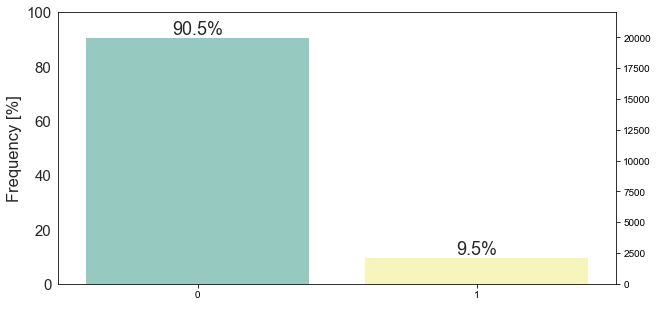

In [36]:
ax = sns.countplot(x = y ,palette="Set3")
sns.set(font_scale=1.5)
ax.set_ylim(top = 150000)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=y.shape[0])
add_freq(y)
plt.show()

Creating arrays for learning based on our features

In [37]:
X_full = np.hstack((X_numeric, X_numeric_norm, X_cat))
X_full_good = np.hstack((X_numeric_good, X_numeric_norm_good, X_cat_good))
test_full = np.hstack((test_numeric, test_numeric_norm, test_cat))

# Training

Separation of the training dataset and target variable into test and training using stratification of samples

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=0, stratify=y)

In [39]:
def cvDictionary(functions, scoring_metric, X_train=X_train, y_train=y_train, verbose=1):
    cvDict = {}
    cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 241)
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv=cv, verbose=verbose, scoring=scoring_metric, n_jobs = 3)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

Create classifiers and find the optimal for a given sample, using both the roc_auc metric

In [41]:
knMod = KNeighborsClassifier(n_neighbors = 5, n_jobs = 3)
glmMod = LogisticRegression(penalty = 'l1', C = 1.0)
adaMod = AdaBoostClassifier(n_estimators = 200, learning_rate = 1.0)
gbMod = GradientBoostingClassifier(n_estimators = 50)
rfMod = RandomForestClassifier(n_estimators = 50)

In [42]:
cvD = cvDictionary([knMod, glmMod, adaMod, gbMod, rfMod], 'roc_auc', X_train, y_train)

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:   15.7s finished
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:   12.6s finished
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:   28.5s finished
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:   18.5s finished
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:   13.5s finished


In [43]:
cvD

{'AdaBoostClassifier': [0.8030278895595796, 0.006936492656776652],
 'GradientBoostingClassifier': [0.80006287726358138, 0.0065951657514010283],
 'KNeighborsClassifier': [0.6556025970638647, 0.011569499221281775],
 'LogisticRegression': [0.79814181384603911, 0.0039023497920167528],
 'RandomForestClassifier': [0.76870929279379985, 0.012346003231386045]}

As you can see, the best values were shown by AdaBoostClassifier, GradientBoostingClassifier, LogisticRegression. We will try to walk through their parameters and improve the quality using GridSearchCV

In [44]:
from sklearn.model_selection import GridSearchCV
cv = StratifiedShuffleSplit(n_splits = 3, test_size = 0.2, random_state = 241)

In [45]:
%%time
glmHyperParams = {'C' : [0.1, 1, 10, 100],
                 'penalty': ['l2', 'l1']}
grid_cv_lr = GridSearchCV(glmMod, glmHyperParams, scoring = 'roc_auc', cv=cv, n_jobs = 3)
grid_cv_lr.fit(X_train, y_train)

Wall time: 15.3 s


In [46]:
grid_cv_lr.best_params_, grid_cv_lr.best_score_

({'C': 1, 'penalty': 'l1'}, 0.79530982189432908)

Classifier LogisticRegression didn't improve result

In [47]:
%%time
adaHyperParams = {'n_estimators': [50, 100, 150, 200]}
grid_cv_ada = GridSearchCV(adaMod, adaHyperParams, scoring = 'roc_auc', cv=cv, n_jobs = 3)
grid_cv_ada.fit(X_train, y_train)

Wall time: 43.1 s


In [48]:
grid_cv_ada.best_params_, grid_cv_ada.best_score_

({'n_estimators': 100}, 0.80085637280472954)

In [49]:
bestAdaModFitted = grid_cv_ada.best_estimator_.fit(X_train, y_train)

In [50]:
from sklearn.metrics import auc, roc_curve

Finding the auc and gini metrics for AdaBoostClassifier

In [51]:
preds = bestAdaModFitted.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
auc_ada = auc(fpr, tpr)
gini_ada = 2 * auc_ada - 1
(auc_ada, gini_ada)

(0.81914362038328981, 0.63828724076657961)

Function for constructing the roc curve

In [52]:
def build_roc_auc(auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    fig = plt.gcf()
    fig.set_size_inches(15,5)
    plt.show()

Building a roc curve for AdaBoostClassifier

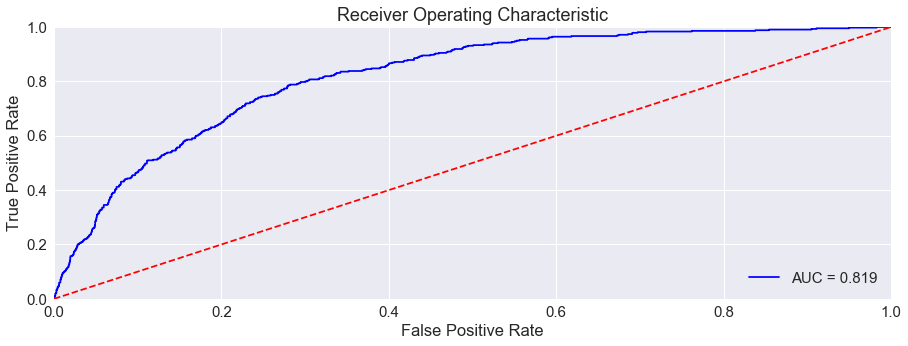

In [53]:
build_roc_auc(auc_ada)

In [54]:
%%time
gbHyperParams = {'n_estimators': [150, 200, 250],
                 'max_depth': [2, 3, 4]}
grid_cv_gb = GridSearchCV(gbMod, gbHyperParams, scoring = 'roc_auc', cv=cv, n_jobs = 3)
grid_cv_gb.fit(X_train, y_train)

Wall time: 3min 15s


In [55]:
grid_cv_gb.best_params_, grid_cv_gb.best_score_

({'max_depth': 2, 'n_estimators': 250}, 0.80606773356186512)

In [56]:
bestGbModFitted = grid_cv_gb.best_estimator_.fit(X_train, y_train)

Finding the auc and gini metrics for the GradientBoostingClassifier

In [57]:
preds = bestGbModFitted.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
auc_gb = auc(fpr, tpr)
gini_gb = 2 * auc_gb - 1
(auc_gb, gini_gb)

(0.8187226455821498, 0.6374452911642996)

Building a roc curve for the GradientBoostingClassifier

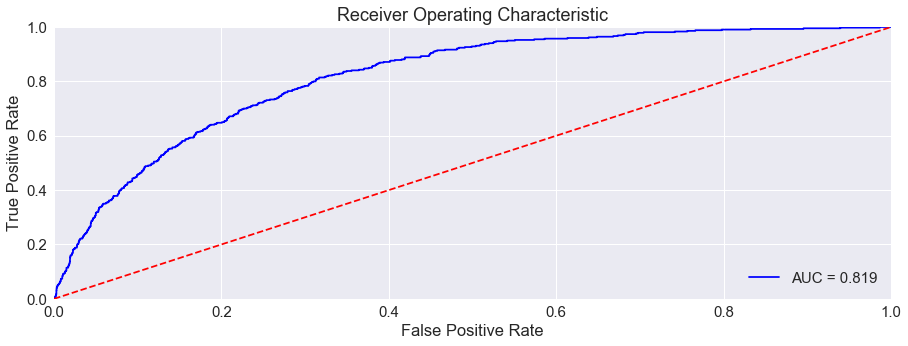

In [58]:
build_roc_auc(auc_gb)

Variant of the function for counting gini without using the auc metric from sklearn.metrics

In [59]:
def gini(actual, pred, cmpcol = 0, sortcol = 1):
    assert( len(actual) == len(pred) )
    all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
    all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)

def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)

In [60]:
gini_normalized(y_test, preds)

0.63744767629065147

Function for finding the optimal point on roc_curve

In [61]:
def rocZeroOne(y_true, y_predicted_porba):
    
    from sklearn.metrics import roc_curve
    from scipy.spatial.distance import euclidean
    
    fpr, tpr, thresholds = roc_curve(y_true, y_predicted_porba[:, 1])
    
    best = [0, 1]
    dist = []
    for (x, y) in zip(fpr, tpr):
        dist.append([euclidean([x,y], best)])

    bestPoint = [fpr[dist.index(min(dist))], tpr[dist.index(min(dist))]]
    
    bestCutOff1 = thresholds[list(fpr).index(bestPoint[0])]
    bestCutOff2 = thresholds[list(tpr).index(bestPoint[1])]
    
    print ('\n' + 'Best point on the ROC: TPR = {:0.3f}%, FPR = {:0.3f}%'.format(bestPoint[1]*100, bestPoint[0]*100))
    print ('\n' + 'Best Cut-Off point: {:0.4f}'.format(bestCutOff1))

    plt.plot(dist)
    plt.xlabel('Index')
    plt.ylabel('Euclidean Distance to the perfect [0,1]')
    fig = plt.gcf()
    fig.set_size_inches(15,5)

Finding the optimal point on roc_curve for GradientBoostingClassifier


Best point on the ROC: TPR = 76.429%, FPR = 27.899%

Best Cut-Off point: 0.0912


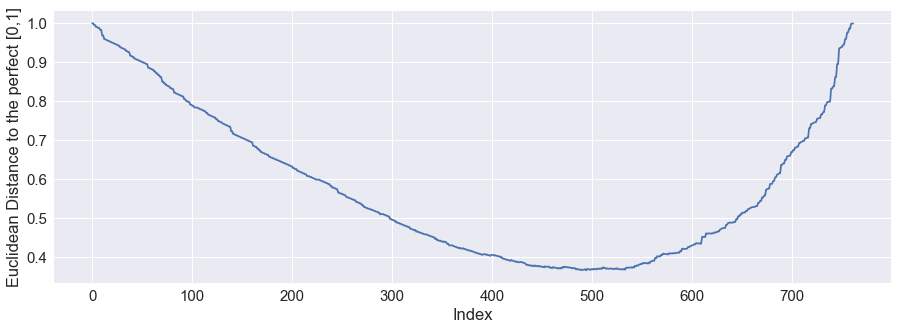

In [62]:
rocZeroOne(y_test, bestGbModFitted.predict_proba(X_test))

Finding the optimal point on roc_curve for AdaBoostClassifier 


Best point on the ROC: TPR = 78.129%, FPR = 26.374%

Best Cut-Off point: 0.4944


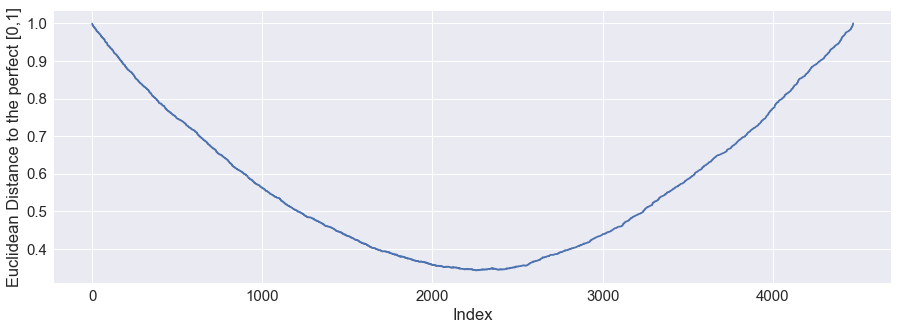

In [63]:
rocZeroOne(y_train, bestAdaModFitted.predict_proba(X_train))

Function of constructing an error matrix

In [64]:
def plot_confusion_matrix(y_true, y_pred, title = 'Confusion matrix', cmap=plt.cm.Blues):
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    print('Classification Report:\n')
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    def plot_confusion_matrix_plot(cm, title = 'Confusion matrix', cmap=plt.cm.Blues):
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(y_test.unique()))
        plt.xticks(tick_marks, rotation=45)
        plt.yticks(tick_marks)
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
    
    print('\n Confusion matrix, without normalization: \n')
    print(cm)
    plot_confusion_matrix_plot(cm=cm)
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('\n Normalized confusion matrix \n')
    print(cm_normalized)
    plt.figure()
    plot_confusion_matrix_plot(cm_normalized, title='Normalized confusion matrix')

def makePredThresh(fittedCls, thr, X_test):
    prob = fittedCls.predict_proba(X_test)[: ,1]
    final = []
    for p in prob:
        if p >= thr:
            final.append(1)
        else:
            final.append(0)
    
    return final

In [65]:
pred = makePredThresh(bestGbModFitted, 0.0912, X_test)

error matrix for GradientBoostingClassifier

Classification Report:

             precision    recall  f1-score   support

          0       0.97      0.72      0.83      3993
          1       0.22      0.76      0.34       420

avg / total       0.90      0.72      0.78      4413


 Confusion matrix, without normalization: 

[[2880 1113]
 [ 101  319]]

 Normalized confusion matrix 

[[ 0.72126221  0.27873779]
 [ 0.24047619  0.75952381]]


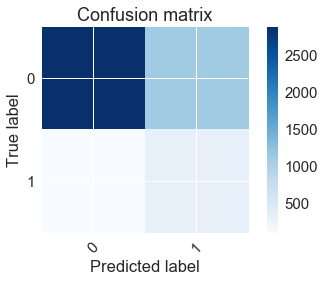

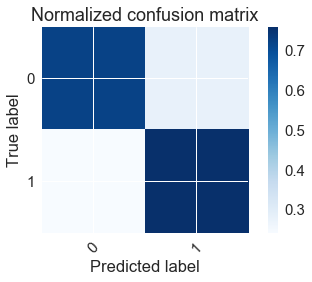

In [66]:
plot_confusion_matrix(y_test, pred)

In [67]:
predAda = makePredThresh(bestAdaModFitted, 0.4943, X_test)

error matrix for AdaBoostClassifier

Classification Report:

             precision    recall  f1-score   support

          0       0.97      0.72      0.83      3993
          1       0.23      0.79      0.35       420

avg / total       0.90      0.73      0.78      4413


 Confusion matrix, without normalization: 

[[2870 1123]
 [  90  330]]

 Normalized confusion matrix 

[[ 0.71875783  0.28124217]
 [ 0.21428571  0.78571429]]


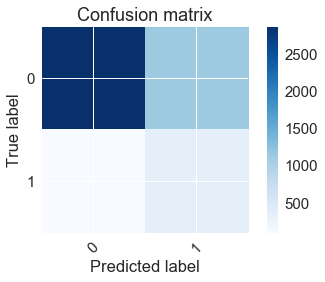

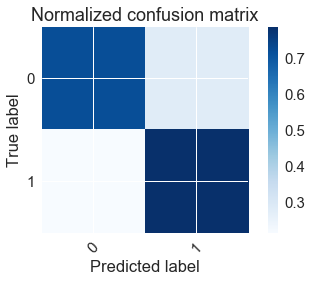

In [68]:
plot_confusion_matrix(y_test, predAda)

Both algorithms showed approximately the same quality, we will stop at GradientBoostingClassifier, as it interprets probabilities in a more familiar mode. Find the probability matrix for the test and training dataset.

In [69]:
prob_train = bestGbModFitted.predict_proba(X_full)
prob_test = bestGbModFitted.predict_proba(test_full)

In [70]:
prob_train_check = prob_train[:, 1]
prob_test_check = prob_test[:, 1]

We find the best classifier that extinguishes credit compares the target variable y_delay_train, where 0 - the loan was repaid in time, 1- was overdue, 2 - the extension date is longer than the original loan end date, and we will train it

In [71]:
cvD_good = cvDictionary([knMod, glmMod, adaMod, gbMod, rfMod], 'log_loss', X_full_good, y_delay_train)

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    8.8s finished
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    7.8s finished
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:   29.6s finished
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:   42.6s finished
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    8.9s finished


In [72]:
cvD_good

{'AdaBoostClassifier': [-1.0963838377434278, 0.0001011813297753818],
 'GradientBoostingClassifier': [-0.92348036759897612, 0.0020357997231409599],
 'KNeighborsClassifier': [-5.1310814815506003, 0.12265139567655213],
 'LogisticRegression': [-0.93872483370965953, 0.0033791536489271071],
 'RandomForestClassifier': [-1.0288708006063689, 0.016554002262778918]}

In [73]:
%%time
gbHyperParams = {'n_estimators': [50, 100, 200],
                 'max_depth': [1, 3, 5]}
grid_cv_gb_good = GridSearchCV(gbMod, gbHyperParams, scoring = 'log_loss', cv=cv, n_jobs = 3)
grid_cv_gb_good.fit(X_full_good, y_delay_train)

Wall time: 7min 13s


In [74]:
grid_cv_gb_good.best_params_, grid_cv_gb_good.best_score_

({'max_depth': 3, 'n_estimators': 200}, -0.91774104799641165)

In [75]:
bestGbModFittedGood = grid_cv_gb_good.best_estimator_.fit(X_full_good, y_delay_train)

Find the probability matrices for the test and training dataset for the variable y_delay_train

In [76]:
preds_good_train = bestGbModFittedGood.predict_proba(X_full)
preds_good_test = bestGbModFittedGood.predict_proba(test_full)

Calculate the variables profit_train, profit_test expected profit for the test and training dataset, which will display the expected profit, not taking into account the probability of a possible return of interest on an outstanding loan.

In [77]:
profit_credit_train = [i[0] * mean_percents + i[1] * mean_pay + i[2] *mean_pay_pr for i in preds_good_train]
profit_credit_test = [i[0] * mean_percents + i[1] * mean_pay + i[2] *mean_pay_pr for i in preds_good_test]

In [78]:
profit_train = np.array([prob_train[i][0] * amount - prob_train[i][1] for i, amount in enumerate(profit_credit_train)])
profit_test = np.array([prob_test[i][0] * amount - prob_test[i][1] for i, amount in enumerate(profit_credit_test)])

In [79]:
scoring_class_train = np.column_stack((prob_train_check, profit_train))
scoring_class_test = np.column_stack((prob_test_check, profit_test))

Separation of our clients into 4 classes, where 1 - it is necessary to lend, 2 - you can lend, 3 - you can lend, with increased risk of non-return, 4 - you can not categorically credit

In [80]:
size_train = len(scoring_class_train)
category_сredit_train = np.zeros(size_train)
for i in range(size_train):
    if scoring_class_train[i, 0] < 0.023:
        category_сredit_train[i] = 1
    elif scoring_class_train[i, 0] < 0.07:
        category_сredit_train[i] = 2
    elif scoring_class_train[i, 0] < 0.2 and scoring_class_train[i, 1] > 0.43:
        category_сredit_train[i] = 3    
    else:
        category_сredit_train[i] = 4    

In [82]:
class_train_checker = np.column_stack((scoring_class_train, y, category_сredit_train))

In [84]:
from collections import Counter
import math
from scipy.stats import ks_2samp

In [85]:
print('Возврат кредита для 1 класса: 0 - да, 1 - нет')
print(Counter(i for i in class_train_checker[class_train_checker[:,3] == 1][:,2]))
print('Возврат кредита для 1 класса: 0 - да, 1 - нет')
print(Counter(i for i in class_train_checker[class_train_checker[:,3] == 2][:,2]))
print('Возврат кредита для 1 класса: 0 - да, 1 - нет')
print(Counter(i for i in class_train_checker[class_train_checker[:,3] == 3][:,2]))
print('Возврат кредита для 1 класса: 0 - да, 1 - нет')
print(Counter(i for i in class_train_checker[class_train_checker[:,3] == 4][:,2]))

Возврат кредита для 1 класса: 0 - да, 1 - нет
Counter({0.0: 5063, 1.0: 19})
Возврат кредита для 1 класса: 0 - да, 1 - нет
Counter({0.0: 7686, 1.0: 255})
Возврат кредита для 1 класса: 0 - да, 1 - нет
Counter({0.0: 2826, 1.0: 380})
Возврат кредита для 1 класса: 0 - да, 1 - нет
Counter({0.0: 4392, 1.0: 1444})


In [86]:
size_test = len(scoring_class_test)
category_сredit_test = np.zeros(size_test)
for i in range(size_test):
    if scoring_class_test[i, 0] < 0.023:
        category_сredit_test[i] = 1
    elif scoring_class_test[i, 0] < 0.07:
        category_сredit_test[i] = 2
    elif scoring_class_test[i, 0] < 0.2 and scoring_class_test[i, 1] > 0.43:
        category_сredit_test[i] = 3    
    else:
        category_сredit_test[i] = 4    

In [87]:
counter_train = Counter(i for i in category_сredit_train)
counter_test = Counter(i for i in category_сredit_test)

In [88]:
print(counter_train)
print(counter_test)

Counter({2.0: 7941, 4.0: 5836, 1.0: 5082, 3.0: 3206})
Counter({2.0: 4428, 4.0: 3991, 1.0: 3110, 3.0: 1817})


Population stability index

In [89]:
PSI = sum([math.log((counter_test[key] * size_train) / (counter_train[key] * size_test)) * (counter_test[key] / size_test - 
                                            counter_train[key] / size_train) for key in counter_train.keys()])
PSI

0.007154355702547228

Graphs of distribution functions for the training and test dataset

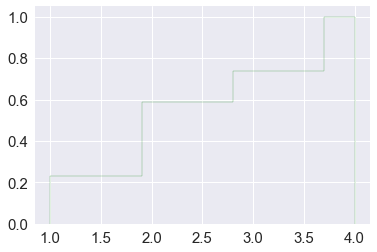

In [91]:
plt.hist(category_сredit_train, normed=True, cumulative=True, label='CDF', histtype='step', alpha=0.8, color = 'g')
plt.show()

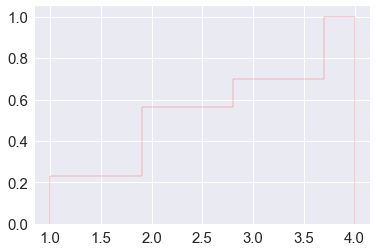

In [92]:
plt.hist(category_сredit_test, normed=True, cumulative=True, label='CDF', histtype='step', alpha=0.8, color='r')
plt.show()

In [107]:
answer = np.column_stack((test_data['Договор номер'], category_сredit_test))

Вывод ответа в файл answer.txt

In [111]:
with open('answer.txt', 'w') as f:
    f.write("{0}\t{1}\n".format('Contract_number','Client_class'))
    for x, y in answer:
        f.write("{0}\t{1}\n".format(x,y))

# Conclusion

Based on the gradient and adaptive boosting and the roc_auc metric, classifiers were constructed to determine the customer's return of the loan. For these classifiers, a roc-curve was constructed, and metrics gini and auc - (0.8187226455821498, 0.6374452911642996), (0.81914362038328981, 0.63828724076657961), respectively, were found. Also, for each algorithm, optimal points were found on the roc-curve with classification thresholds (0.0912, 0.4944) and error matrices were constructed. For further use, a gradient-based classifier was chosen. In addition, a classifier was created to determine the probability of delinquency or prolonged prolongation for customers who repaid the loan on time. To build it, we used gradient boosting and a quality metric called log_loss. With the help of this classifier, the expected profit for each client was calculated. As a result, the aggregate of clients was divided into 4 classes - 1 - it is necessary to credit, 2 - you can lend, 3 - you can lend, with increased risk of non-return, 4 - you can not lend. And for the separation of grade 3 from 4 used high expected profit. Based on this classification for the test and training dataset, graphs of the distribution functions were constructed. The classification results are displayed in a text file called answer.txt.